# Classification and Regression

### Dataset
- Dataset: [Pima Indian Diabetes Dataset](http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.names)
- The Diabetes dataset records measurements about several hundred patients with an indication of whether or not they tested positive for diabetes (the class label).  
- The classification problem is to predict whether a patient will test positive for diabetes given some other measurements.


## Train Test Split
- (as briefly mentioned in last weeks' tute)
- We want to split our dataset into train and test to "train" our model (usually finding the coefficients or optimal parameters) before using the "test" set to **evaluate** our model.
- A common split is to have 80% on training and 20% on test.
- More advanced techniques include $k$-fold Cross Validation (CV).

In [1]:
import pandas as pd

df = pd.read_csv('pima-indians-diabetes.csv', encoding='ISO-8859-1')
df.head()

,numpregnant,plasma,blood pressure,sf-thickness,serum-insulin,BMI,pedigree-function,age,has_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# Features (get all columns except the last one which is our label has_diabetes)
X = df[df.columns[:-1]]
X.head()

,numpregnant,plasma,blood pressure,sf-thickness,serum-insulin,BMI,pedigree-function,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [3]:
# Class label
y = df['has_diabetes']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: has_diabetes, dtype: int64

Let's do a train test split using 80% for train and 20% for test.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [5]:
X_train.head()

,numpregnant,plasma,blood pressure,sf-thickness,serum-insulin,BMI,pedigree-function,age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


- You should now note that the index column is in some arbitrary order (hence randomly chosen split).
- As you can see, some of the attributes are disproportionate to other other attributes (i.e `serum-insulin` has value `370` whilst `pedigree-function` seems to be far smaller).
- To combat this, we should normalise (or standardise) our dataset.

## Feature Scaling
- With few exceptions, many Machine Learning (ML) algorithms generally don't preform well when the input data consists of continuous attributes with varying scales.
- The two main ways to feature scale are using **Min-Max Scaling** (normalization) or **Standardisation**.
    - **Min-Max Scaling:** Data is shifted and scaled such that they now range between 0 and 1.
    - **Standardisation:** Data has resulting distribution of 0 mean and unit variance (in other words, variance = 1).
    
**IMPORTANT:** With any transformation, it is imperative that you fit the scaler to the **training data only** and NEVER to the full dataset. Once you fit your scaler to the training data, then you should use that to trasnform your test.

For this example, we will standardise our data.

In [6]:
from sklearn.preprocessing import StandardScaler

# notice here that I fit it to my train
scaler = StandardScaler().fit(X_train)

# and using this "fit", I transform both my train and test USING the fitted train scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## $k$-Nearest Neighbour (kNN)
- A supervised clustering algorithm similar to $k$-means.
- Rather than iteratively update the centroids in an unsupervised manner (recall $k$-means does not care about labels), $k$-NN aims to classify new data *given* the label of the existing $k$ nearest points.


As such, $k$-means and $k$-NN are used for different problems:
- $k$-means clustering is unsupervised that looks to gather and group data into $k$ number of clusters by looking at the data points only;
- whilst $k$-NN is a supervised classifier that will classify new data points according to the $k$ nearest data points (that were given during training). 
- I like to think of $k$-NN as a majority vote, if you have $k$=5 and your new data point has 2 $\times$ `True` and 3 $\times$ `False`, then your new data point will be classified as `False`.

Hopefully it's intuitive, but to avoid ties in majority votes it's best to use **odd values of $k$**.

Documentation: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [7]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [8]:
knn = KNN(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In terms of code, predicting the class label using $k$-NN is as simple as using `predict()`.

In [9]:
y_pred = knn.predict(X_test)

To evaluate our performance, we can use the Classification Accuracy.
- This is literally just the percentage of correct divided by total number of predictions.

There are better metrics such as Precision, Recall, and F1-Score as well...

In [10]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.6623376623376623

## Question 1
Here's a scatter plot that shows varying values of $k$ vs the Classification Accuracy.
- What seems to be the best value of $k$ for this dataset?
- Is this $k$ always the best for any dataset?

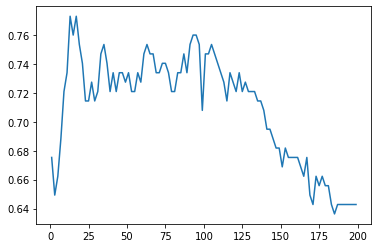

In [11]:
import matplotlib.pyplot as plt

results = {}

krange = range(1, 201, 2)

for k in krange:
    knn = KNN(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    results[k] = accuracy_score(y_test, y_pred)
    
plt.plot(krange, results.values())
plt.show()

In [12]:
sorted(results.items(), key=lambda x: -x[1])[:5]

[(13, 0.7727272727272727),
 (17, 0.7727272727272727),
 (15, 0.7597402597402597),
 (93, 0.7597402597402597),
 (95, 0.7597402597402597)]

## Decision Tree Classifier
- Decision Tree Classifiers are (imho) one of the most useful alternatives to regression and is a great way of comparing different approaches and predictions.
- Although trees usually use Gini as a split criterion, we will use the more familiar **entropy** for this example.
- Additionally, we'll enforce a "max depth" of 3, which controls how "deep" or "big" a tree can be. This is because we want to visualise the tree itself afterwards.

In [13]:
from sklearn.tree import DecisionTreeClassifier as DT

dt = DT(criterion="entropy", random_state=42, max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [14]:
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.7662337662337663

## OPTIONAL
- Some optional code to "visualise" the decision tree

WSL2 (Linux):
```python
pip3 install graphviz
sudo apt-get install graphviz
```

Conda Terminal:
```
conda install -c conda-forge python-graphviz
```

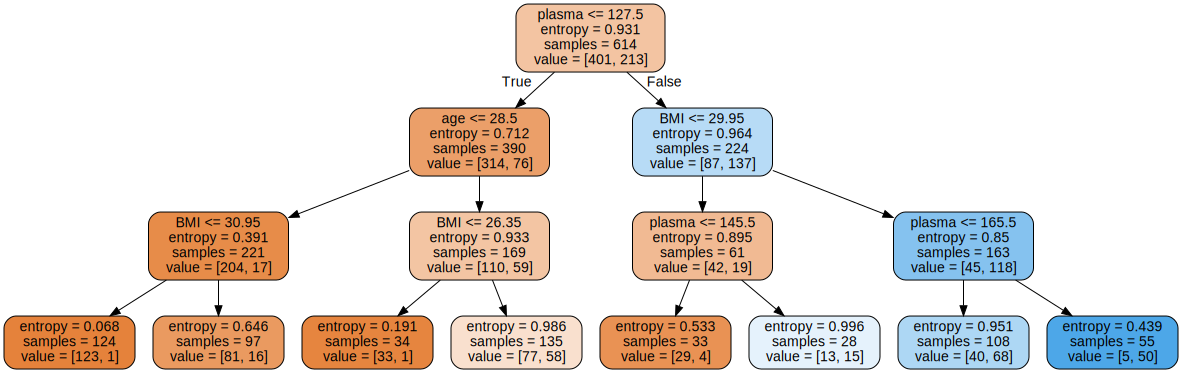

In [15]:
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(dt, out_file="mytree.dot", 
                feature_names=X.columns, 
                filled=True, rounded=True)

with open("./mytree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

## Question 2
Here's a scatter plot that shows varying values of the DT given a higher percentage of training data size.
- What seems to be the best size of training data?
- Is it a good idea to have a training set that big?

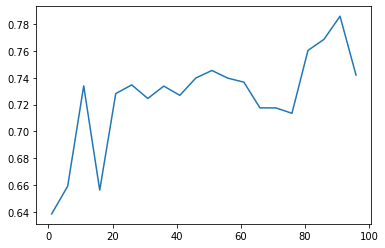

In [16]:
split_sizes = range(1, 101, 5)
results = {}

for split in split_sizes:
    X1, X2, y_train, y_test = train_test_split(X, y, train_size = split/100, 
                                      test_size=(1 - split/100), random_state=42)
    
    scaler = StandardScaler().fit(X1)
    X_train = scaler.transform(X1)
    X_test = scaler.transform(X2)
    
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict(X_test)
    results[split] = accuracy_score(y_test, y_pred)
    
plt.plot(split_sizes, results.values())
plt.show()

## Linear Regression
- Refer to Part 2 of Week 8 lab